<a href="https://colab.research.google.com/github/anruki/PID-sistema-de-control/blob/main/simulationpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Student__: Ana Robledano Abasolo

__Date__: 23/04/2024

__University__: Universidad Francisco de Vitoria


# SISTEMAS DE CONTROL – INGENIERÍA MATEMÁTICA
## Inverted Pendulum Stabilization using PID Control `[Proyecto Final]`




Firstly, we install the `control` package in Python, which provides tools for control systems analysis and design.

In [177]:
!pip install control

The following libraries will also be needed for the execution of the program:

In [178]:
import numpy as np
import control as ctrl

**1.   MODELING**



To model an inverted pendul system, we must define its transfer function given by:
$$ G(s) = \frac{1}{s^2 - \frac{g}{l}} $$


In [179]:
g = 9.81 # gravity (m/s^2)
l = 1.0 # length of the pendulum (m)
m = 1.0 # mass of the pendulum (kg)
# Transfer function G(s) = 1 / (s^2 - g/l)
num = [1]
den = [1, 0, -g/l]
G = ctrl.TransferFunction(num, den)

The transfer function is the result of linearalising and applying Laplace to the equations of motion of the inverted pendulum.

**2.   STABILITY ANALISIS**

The roots of the denominator of the transfer function G determine the stability of the system. With Pyhon function `poles()` we obtain these roots.

In [180]:
poles = ctrl.poles(G)
print("Poles of the system:", poles)

Poles of the system: [-3.13209195+0.j  3.13209195+0.j]


For our system, we have obtained the poles printed above, we identify that one of them is positive.

According to the `principle of Routh-Hurwitz`, in order for a linear system to be stable, all of its poles must have negative real parts, that is they must all lie within the left-half of the s-plane.

Therefore, the system is unstable.To stabilise it, we will use a PID controller.

**3. PID CONTROLLER DESIGN**

We are going to test different parameters for the gains `(Kp,Ki,Kd)` of a PID controller to stabilize the inverted pendulum.

In [181]:
Kp = [1.0, 10.0, 100.0, 100.0] # Proportional gain
Ki = [1.0, 1.0, 1.0, 1.0]      # Integral gain
Kd = [2.0, 1.0, 1.0, 20.0]     # Derivative gain

**4. SIMULATION**

We observe the response of the system to different
initial conditions and disturbances.

**First results**


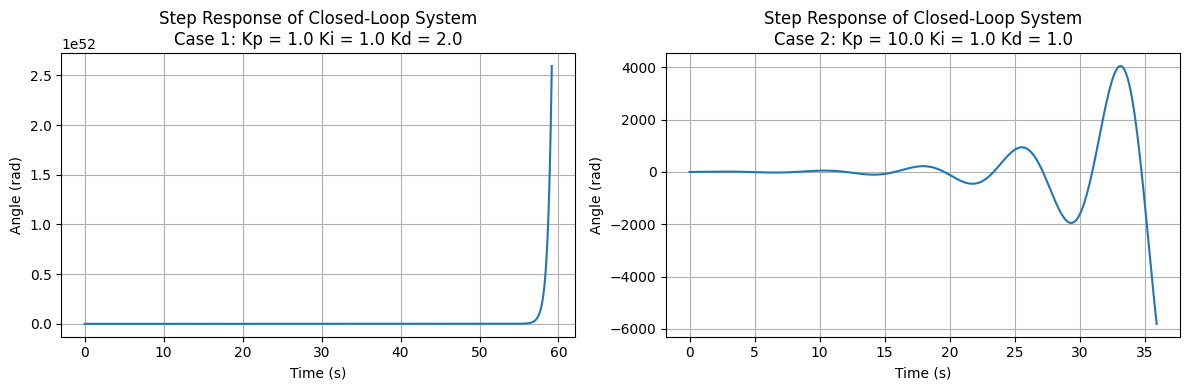

In [182]:
import matplotlib.pyplot as plt
# Create a figure with subplots
fig, axs = plt.subplots(1,2, figsize=(12, 4))

# Iterate over each subplot
for i in range(2):
  # PID controller
  controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
  # Closed-loop system
  closed_loop = ctrl.feedback(G * controller)
  # Time response
  t, y = ctrl.step_response(closed_loop)
  # Plotting
  axs[i].plot(t, y)
  axs[i].set_xlabel('Time (s)')
  axs[i].set_ylabel('Angle (rad)')
  axs[i].set_title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
  axs[i].grid(True)
plt.tight_layout()
plt.show()


These responses are not stable. We modify the response by increasing the proportional and derivative gain.

<Figure size 1200x400 with 0 Axes>

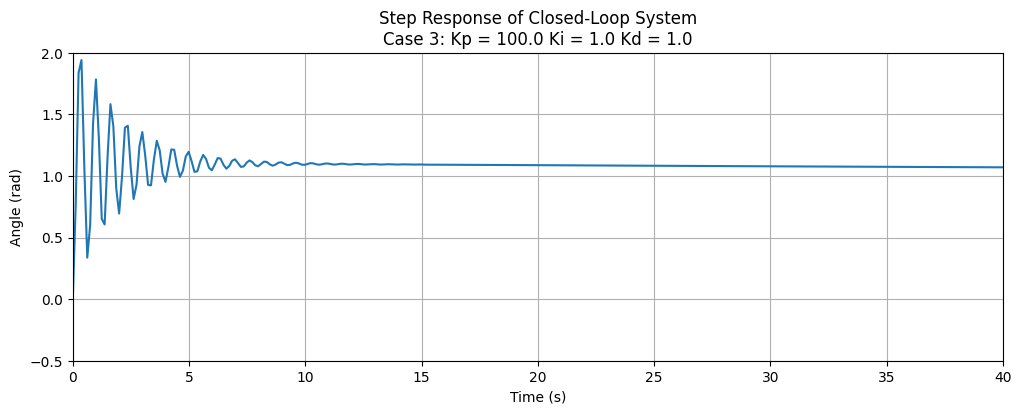

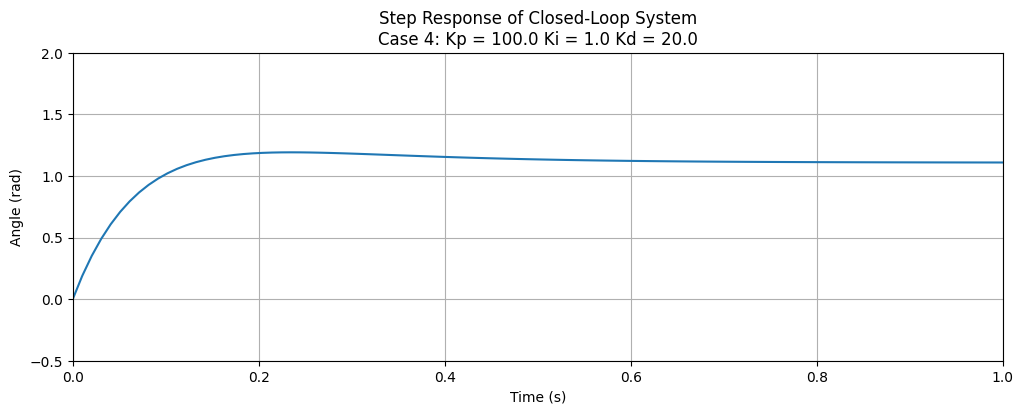

In [183]:
import matplotlib.pyplot as plt
# Specify the size of the plot
plt.figure(figsize=(12, 4))
x_limit = [40,1]
# Iterate over each subplot
for i in range(2,4):
  # PID controller
  controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
  # Closed-loop system
  closed_loop = ctrl.feedback(G * controller)
  # Time response
  t, y = ctrl.step_response(closed_loop)
  # Plotting
  # Specify the size of the plot
  plt.figure(figsize=(12, 4))
  plt.plot(t, y)
  # Labels
  plt.xlabel('Time (s)')
  plt.ylabel('Angle (rad)')
  # Tittle and grid
  plt.title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
  plt.grid(True)
  # Specify the limits of the x-axis and y-axis
  plt.xlim(0, x_limit[i-2])
  plt.ylim(-0.5, 2)
  plt.show()


In case 3, we only increased the $K_p$ variable and got a stable response, specifically it stabilises in aproximately 15 seconds.
By also increasing the $K_d$ variable we have gotten a stable response in less than 1 second for case 4, which is a remarkable improvement.


**5. PERFORMANCE ANALYSIS**

**Unitary Step**

Lastly, we will introduce a unitary step entry to all the previous PID systems.

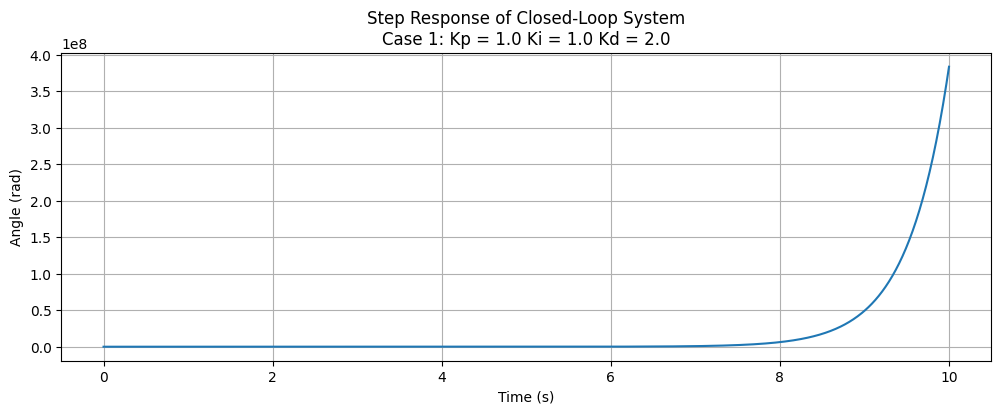

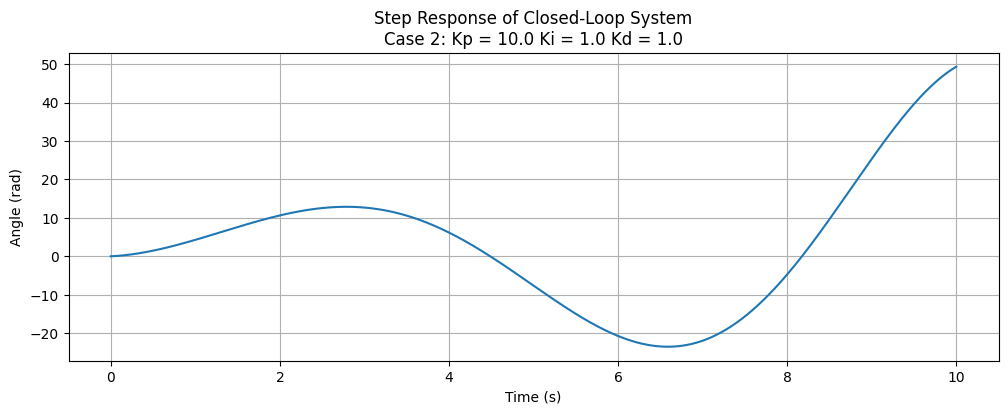

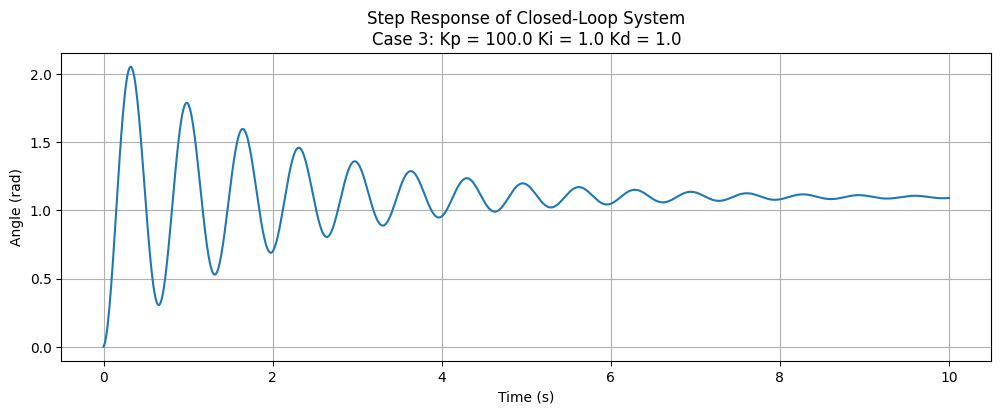

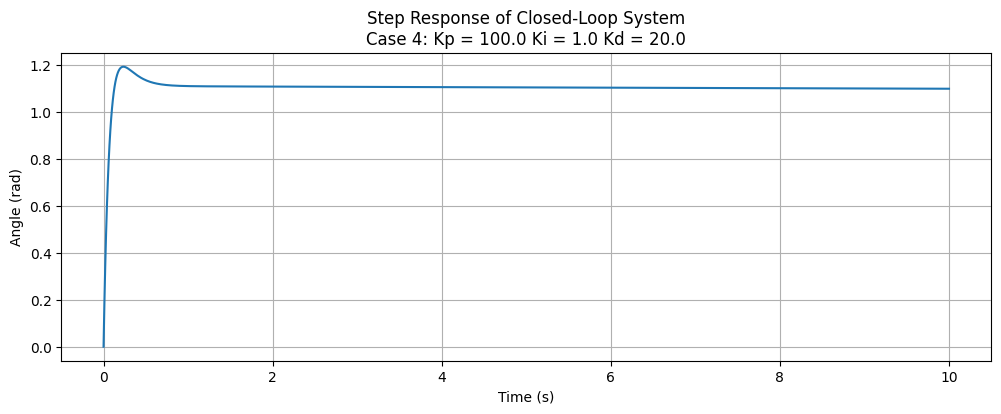

In [184]:
for i in range(4):
  controller = ctrl.TransferFunction([Kd[i], Kp[i], Ki[i]], [1, 0])
  # closed-loop system
  closed_loop = ctrl.feedback(G * controller)

  # Apply unitary step
  t = np.linspace(0, 10, 1000)
  t, y = ctrl.step_response(closed_loop, T=t)

  # Plotting
  # Specify the size of the plot
  plt.figure(figsize=(12, 4))
  plt.plot(t, y)
  # Labels
  plt.xlabel('Time (s)')
  plt.ylabel('Angle (rad)')
  # Tittle and grid
  plt.title(f'Step Response of Closed-Loop System\nCase {i+1}: Kp = {Kp[i]} Ki = {Ki[i]} Kd = {Kd[i]}')
  plt.grid(True)


For cases 1 and 2, both unstable, we identify a difference in the behaviour of the step response when using a unitary step entry. There is a considerable time reduction, for example, in case 1, the first result had an exponential behaviour rapidly increasing values between 50 and 60 seconds. Meanwhile after using a one step entry, the step response increases values between 8 and 10 seconds.

For cases 2 and 3, both stable, there is no disturbance in the response after using a unitary step entry, the graphs remain the same as before.

**6. VISUALIZATION**



We are going to visualise the best PID obtained (case 4 was the one that had a stable behaviour and became stactionary in lesser time). And we will use once again the unitary step entry to test it.

In [186]:
  controller = ctrl.TransferFunction([Kd[3], Kp[3], Ki[3]], [1, 0])
  # closed-loop system
  closed_loop = ctrl.feedback(G * controller)

  # Apply unitary step
  t = np.linspace(0, 10, 1000)
  t, y = ctrl.step_response(closed_loop, T=t)

We proceed with the animation:

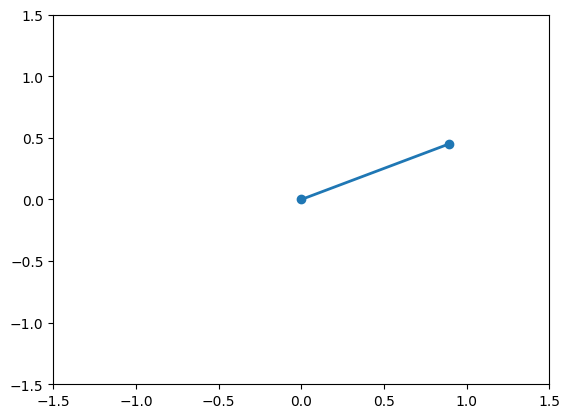

In [188]:
# Libraries for ploting animations
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to animate the pendule
def animate(i):
    line.set_data([0, np.sin(y[i])], [0, np.cos(y[i])])
    return line,

# Configuration of the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], 'o-', lw=2)

# Reduce the number of frames
frames = len(y) // 2

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=20, blit=True)

# Show the animation
HTML(ani.to_jshtml())

**7. CONCLUSIONS**

In conclusion, we have obtained 2 unstable systems (cases 1 and 2) that fluctuate to infinite and 2 stable systems (cases 3 and 4) that stabilise at approximately 1rad.

The last case, showed the best performance, needing less than 2 seconds to stabilise. This means the inverted pendule system would be stationary in very little time.

When we introduced a unitary step function to each case, we noticed that for the unstable cases, the fluctuations would appear quicker (and would still be unstable). However, the last 2 cases tend to the same stability as previously showcased.